In [1]:
import numpy as np

In [2]:
# x = np.array([2,4,1,0,5])

# np.argsort(x, reversed=True)


In [3]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self,x):
        # compute mean of x
        self.mean = np.mean(x,axis=0)
        x = x - self.mean

        cov = np.cov(x.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[: self.n_components]

    
    def project(self,x):
        # projects data
        x= x - self.mean
        return np.dot(x, self.components.T)
        

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


/tmp/ipykernel_5229/123384016.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


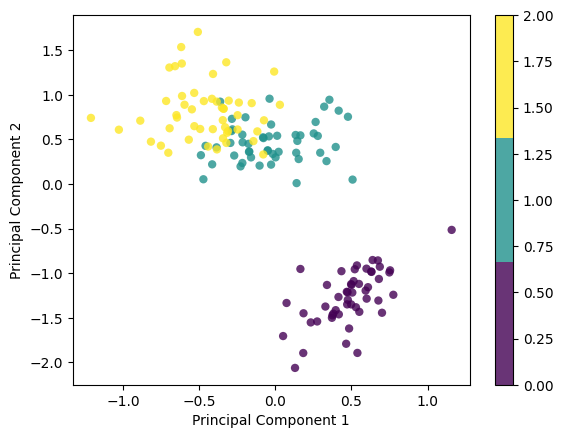

In [4]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.project(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()